In [34]:
%matplotlib inline
from matplotlib.pyplot import imshow
from matplotlib.pyplot import figure
from skimage.io import imread

In [13]:
image = imread("lalaland.jpg")

In [62]:
print(type(image))
print(image.shape)

<class 'numpy.ndarray'>
(1377, 2000, 3)


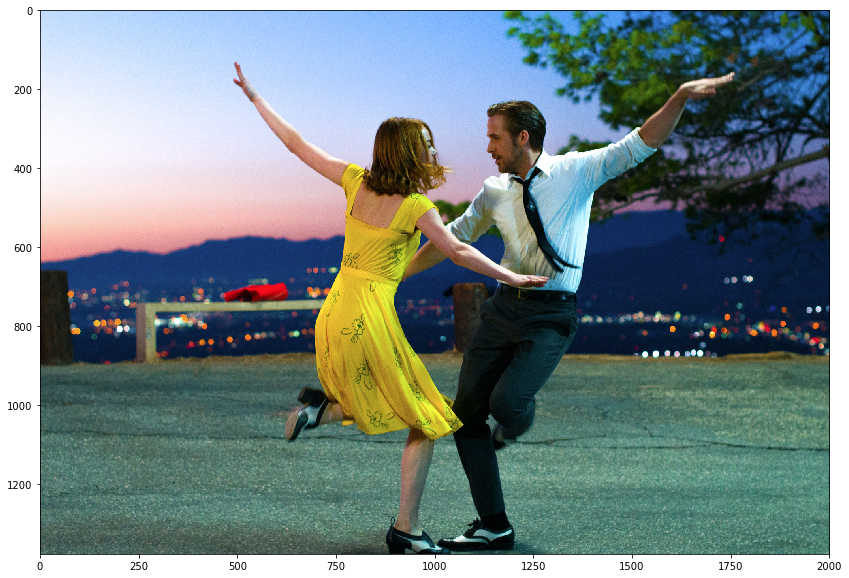

In [36]:
figure(figsize = (15,10))
imshow(image)

In [17]:
from skimage.color import rgb2xyz

In [19]:
xyz = rgb2xyz(image)

In [21]:
xyz.shape

(1377, 2000, 3)

In [29]:
def get_one_color(xyz, axis=0):
    xyz_ = xyz.copy()
    for i in range(3):
        if i == axis:
            continue
        xyz_[:,:,i] = 0
    return xyz_

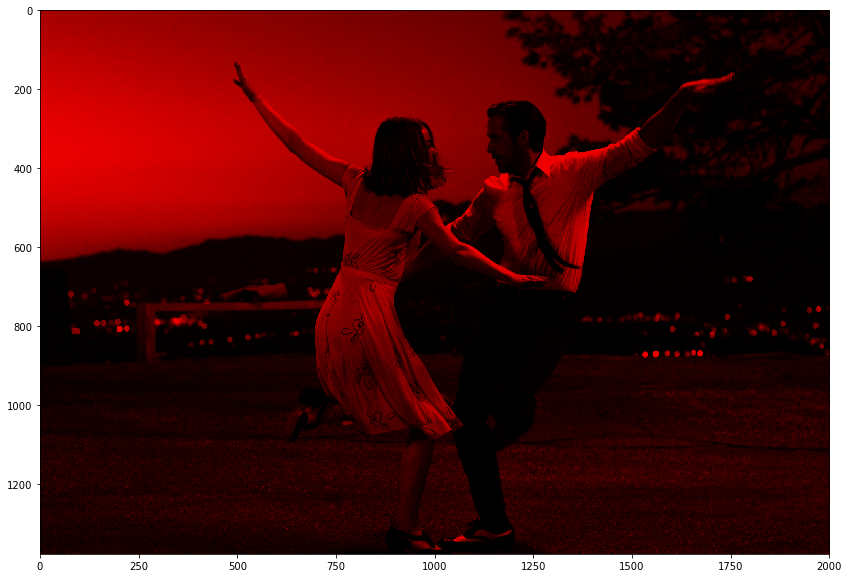

In [37]:
figure(figsize = (15,10))
imshow(get_one_color(xyz, axis=0))

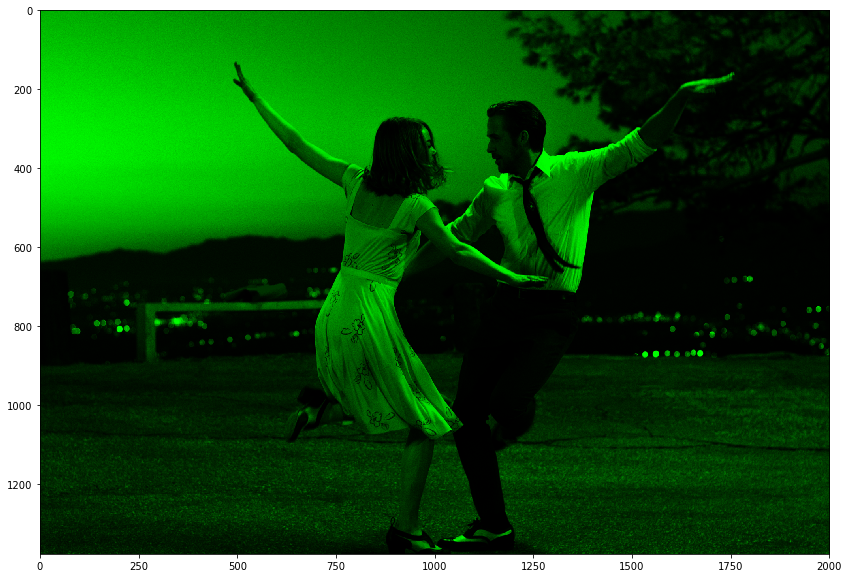

In [38]:
figure(figsize = (15,10))
imshow(get_one_color(xyz, axis=1))

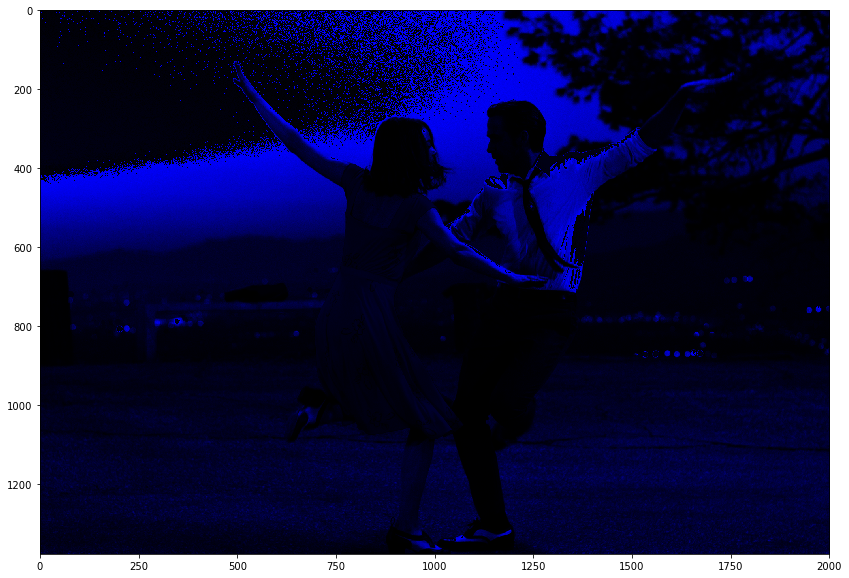

In [39]:
figure(figsize = (15,10))
imshow(get_one_color(xyz, axis=2))

In [40]:
from skimage.color import rgb2gray

gray = rgb2gray(image)

In [46]:
type(gray), gray.shape

(numpy.ndarray, (1377, 2000))

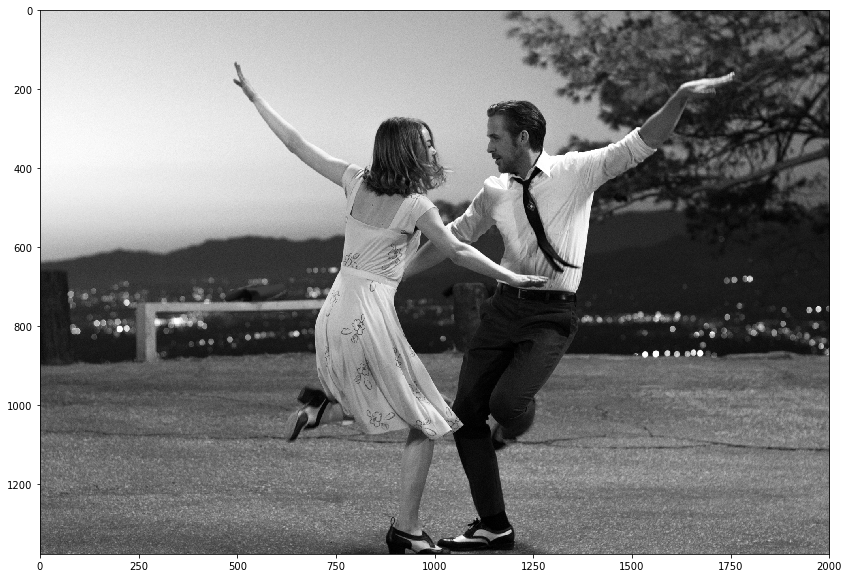

In [44]:
figure(figsize = (15,10))
imshow(gray, cmap='gray')

In [67]:
import numpy as np
edge_filter = np.asarray([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
edge_filter

array([[-1, -1, -1],
       [-1,  8, -1],
       [-1, -1, -1]])

In [68]:
from skimage.transform import rescale

gray_resized = rescale(gray, 0.25)
print(gray.shape, gray_resized.shape)

(1377, 2000) (344, 500)


/home/lovit/anaconda2/envs/scrapper/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [83]:
def apply_filter(image, f):
    n, m = image.shape
    image_ = np.zeros((n-2, m-2))
    for i in range(1, n-1):
        for j in range(1, m-1):
            value = (image[i-1:i+2, j-1:j+2] * f).sum()
            if value < -0.2:
                image_[i-1, j-1] = -1
            elif value > 0.2:
                image_[i-1, j-1] = 1
            else:
                image_[i-1, j-1] = value
    return image_

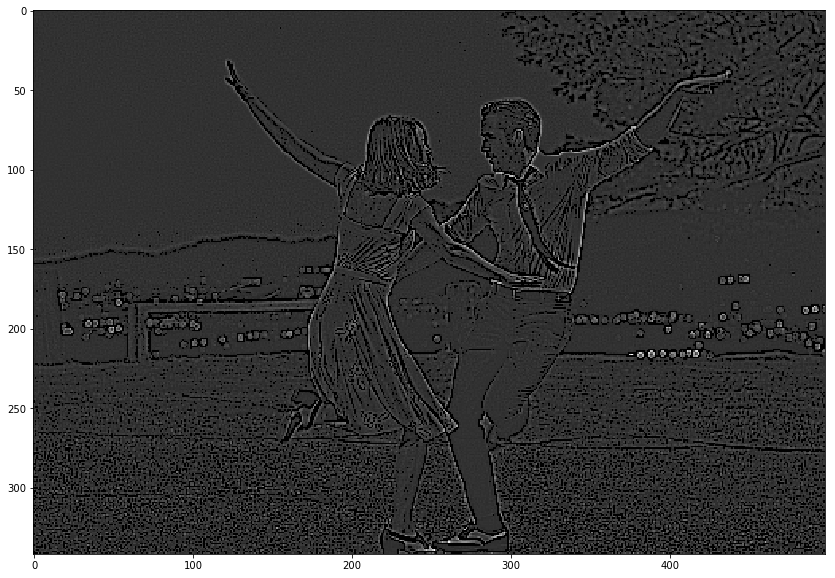

In [84]:
figure(figsize = (15,10))
imshow(apply_filter(gray_resized, edge_filter), cmap='gray')

In [71]:
embossing_filter = np.asarray([[1, 1, 1], [1, 0, -1], [-1, -1, -1]])

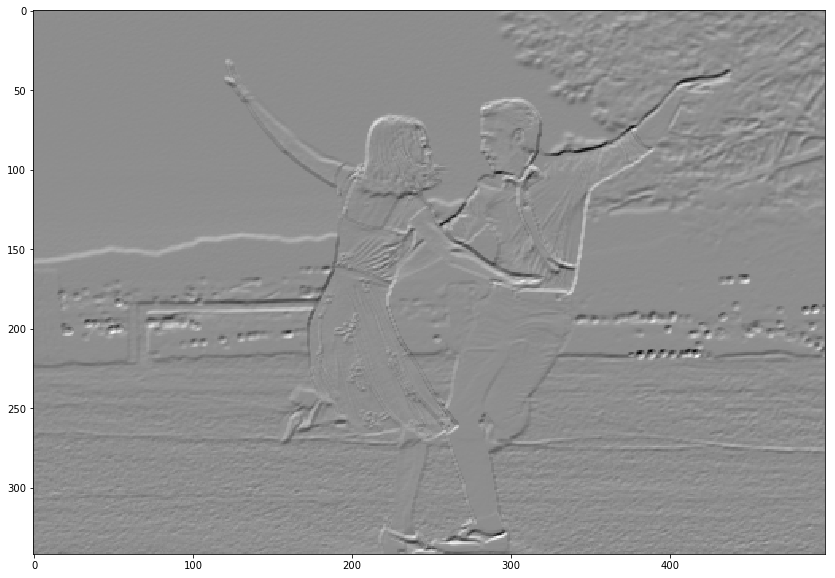

In [72]:
figure(figsize = (15,10))
imshow(apply_filter(gray_resized, embossing_filter), cmap='gray')